# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import string
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import wordnet
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data set exploration

In [104]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

In [105]:
df_train

condition_label                                   medical_abstract
0                    5  Tissue changes around loose prostheses. A cani...
1                    1  Neuropeptide Y and neuron-specific enolase lev...
2                    2  Sexually transmitted diseases of the colon, re...
3                    1  Lipolytic factors associated with murine and h...
4                    3  Does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  Epirubicin at two dose levels with prednisolon...
11546                1  Four and a half year follow up of women with d...
11547                5  Safety of the transbronchial biopsy in outpati...
11548                3  Interictal spikes and hippocampal somatostatin...
11549                5  Recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

In [106]:
df_train["condition_label"].value_counts()/df_train.shape[0]*100

5    33.281385
1    21.904762
4    21.134199
3    13.333333
2    10.346320
Name: condition_label, dtype: float64

In [39]:
df_train.isnull().values.any()

False

In [40]:
len_abstracts = []
for index, row in df_train.iterrows():
    len_abstracts.append(len(row.medical_abstract))

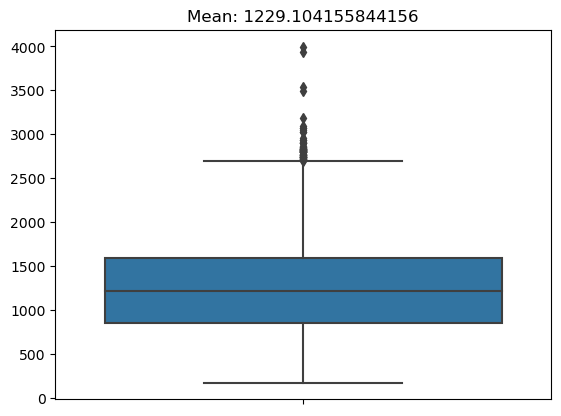

In [41]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [42]:
df_test

condition_label                                   medical_abstract
0                   3  Obstructive sleep apnea following topical orop...
1                   5  Neutrophil function and pyogenic infections in...
2                   5  A phase II study of combined methotrexate and ...
3                   1  Flow cytometric DNA analysis of parathyroid tu...
4                   4  Paraneoplastic vasculitic neuropathy: a treata...
...               ...                                                ...
2883                4  Management of aortobronchial fistula with graf...
2884                5  Tuberculous psoas muscle abscess following che...
2885                4  Clinical evaluation of high-frequency (ultraso...
2886                1  Antitumor activity of liposome-encapsulated do...
2887                4  An unusual venous anomaly of the placenta. The...

[2888 rows x 2 columns]

In [107]:
df_test["condition_label"].value_counts()/df_test.shape[0]*100

5    33.275623
1    21.918283
4    21.121884
3    13.331025
2    10.353186
Name: condition_label, dtype: float64

In [110]:
pd.concat([df_test["condition_label"], df_train["condition_label"]]).value_counts()/(df_test.shape[0]+df_train.shape[0])*100

5    33.280233
1    21.907466
4    21.131736
3    13.332872
2    10.347694
Name: condition_label, dtype: float64

In [44]:
df_test.isnull().values.any()

False

In [45]:
len_abstracts = []
for index, row in df_test.iterrows():
    len_abstracts.append(len(row.medical_abstract))

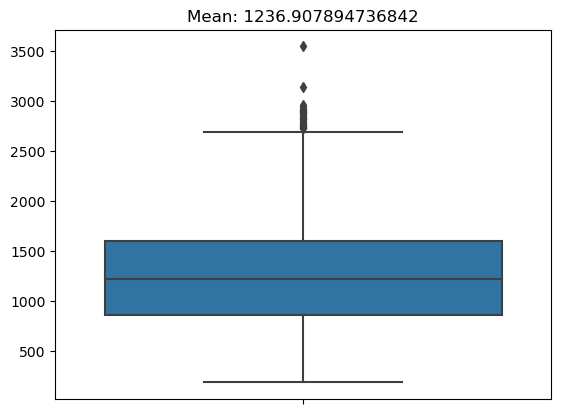

In [46]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [47]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions

# Preprocessing 

In [2]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

## Whitespaces

In [3]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


In [4]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_test.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


## Case folding

In [5]:
newAbs = []
for index, row in df_train.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_train.medical_abstract = newAbs

In [6]:
newAbs = []
for index, row in df_test.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_test.medical_abstract = newAbs

## Punctuation

In [7]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [8]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_punctuation(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_punctuation(x))

In [9]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses a canin...
1                    1  neuropeptide y and neuronspecific enolase leve...
2                    2  sexually transmitted diseases of the colon rec...
3                    1  lipolytic factors associated with murine and h...
4                    3  does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  epirubicin at two dose levels with prednisolon...
11546                1  four and a half year follow up of women with d...
11547                5  safety of the transbronchial biopsy in outpati...
11548                3  interictal spikes and hippocampal somatostatin...
11549                5  recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

In [10]:
df_test

condition_label                                   medical_abstract
0                   3  obstructive sleep apnea following topical orop...
1                   5  neutrophil function and pyogenic infections in...
2                   5  a phase ii study of combined methotrexate and ...
3                   1  flow cytometric dna analysis of parathyroid tu...
4                   4  paraneoplastic vasculitic neuropathy a treatab...
...               ...                                                ...
2883                4  management of aortobronchial fistula with graf...
2884                5  tuberculous psoas muscle abscess following che...
2885                4  clinical evaluation of highfrequency ultrasoni...
2886                1  antitumor activity of liposomeencapsulated dox...
2887                4  an unusual venous anomaly of the placenta the ...

[2888 rows x 2 columns]

## Numbers

In [11]:
cont_number = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    cont_number += sum(c.isdigit() for c in text)
cont_number

230772

In [12]:
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        print(text)

tissue changes around loose prostheses a canine model to investigate the effects of an antiinflammatory agent the aseptically loosened prosthesis provided a means for investigating the in vivo and in vitro activity of the cells associated with the loosening process in seven dogs the cells were isolated and maintained in culture for sufficient periods of time so that their biologic activity could be studied as well as the effect of different agents added to the cells in vivo or in vitro the biologic response as determined by interleukin1 and prostaglandin e2 activity paralleled the roentgenographic appearance of loosening and the technetium images and observations made at the time of revision surgery the correlation between clinical roentgenographic histologic and biochemical loosening indicates that the canine model is suitable for investigating the mechanisms of prosthetic failure a canine model permits the study of possible nonsurgical therapeutic interventions with the ultimate hope

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [13]:
cont_abs = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        cont_abs+= 1
cont_abs/df_train.shape[0]*100

82.45887445887445

In [14]:
df_train['medical_abstract']= df_train['medical_abstract'].apply(lambda x: re.sub(r'\d+', '', x))
df_test['medical_abstract']= df_test['medical_abstract'].apply(lambda x: re.sub(r'\d+', '', x))

## Remove links

In [15]:
def remove_links(text):
    remove_https = re.sub(r'http\S+', ' ', text)
    remove_com = re.sub(r"www\.[A-Za-z]*\.com", " ", remove_https)
    return remove_com

In [16]:
df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_links(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_links(x))

In [17]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses a canin...
1                    1  neuropeptide y and neuronspecific enolase leve...
2                    2  sexually transmitted diseases of the colon rec...
3                    1  lipolytic factors associated with murine and h...
4                    3  does carotid restenosis predict an increased r...
...                ...                                                ...
11545                1  epirubicin at two dose levels with prednisolon...
11546                1  four and a half year follow up of women with d...
11547                5  safety of the transbronchial biopsy in outpati...
11548                3  interictal spikes and hippocampal somatostatin...
11549                5  recurrent thoracic outlet syndrome after first...

[11550 rows x 2 columns]

## Stop Words

In [18]:
cachedStopWords = stopwords.words("english")

In [19]:
def remSw(text):
    return ' '.join([word for word in text.split() if word not in cachedStopWords])


In [20]:
df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remSw(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remSw(x))

In [21]:
df_train

condition_label                                   medical_abstract
0                    5  tissue changes around loose prostheses canine ...
1                    1  neuropeptide neuronspecific enolase levels ben...
2                    2  sexually transmitted diseases colon rectum anu...
3                    1  lipolytic factors associated murine human canc...
4                    3  carotid restenosis predict increased risk late...
...                ...                                                ...
11545                1  epirubicin two dose levels prednisolone treatm...
11546                1  four half year follow women dyskaryotic cervic...
11547                5  safety transbronchial biopsy outpatients objec...
11548                3  interictal spikes hippocampal somatostatin lev...
11549                5  recurrent thoracic outlet syndrome first rib r...

[11550 rows x 2 columns]

## Tokenization

In [22]:
def tokenize(text):
    return WordPunctTokenizer().tokenize(text)

In [23]:
df_train['medical_abstract_token'] = df_train['medical_abstract'].apply(lambda x: tokenize(x))
df_test['medical_abstract_token'] = df_test['medical_abstract'].apply(lambda x: tokenize(x))

In [24]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  
0      [tissue, changes, around, loose, prostheses, c...  
1      [neuropeptide, neuronspecific, enolase, levels...  
2      [sexually, transmitted, diseases, colon, rectu...  
3      [lipolytic, factors, associated, murine, human...  
4      [carotid, restenosis, predict, increased, risk...  
...                                                  ...  
11545  [epirubicin, two, dose, levels, prednisolone, ...  
11546  [four, half, year, follow, women, dyskaryotic,...  
11547  [safety, transbronchial, biopsy, outpatients, ...  
11548  [interictal, spikes, hippocampal, somatostatin...  
11549  [recurrent, thoracic, outlet, syndrome, first,...  

[11550 rows x 3 columns]

## POS Tagging

In [25]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [27]:
def pos(tokens):
    return nltk.pos_tag(tokens, tagset='universal')

In [28]:
df_train['medical_abstract_pos'] = df_train['medical_abstract_token'].apply(lambda x: pos(x))
df_test['medical_abstract_pos'] = df_test['medical_abstract_token'].apply(lambda x: pos(x))

In [29]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, two, dose, levels, prednisolone, ...   
11546  [four, half, year, follow, women, dyskaryotic,...   
11547  [safety, transbronchial, biopsy, outpatients, ...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...  
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...  
2      [(sexually, ADV), (transmitted, VERB), (diseas...  
3      [(lipolytic, ADJ), (factors, NOUN), (associate...  
4      [(carotid, NOUN), (restenosis, NOUN), (predict...  
...                                                  ...  
11545  [(epirubicin, ADV), (two, NUM), (dose, ADJ), (...  
11546  [(four, NUM), (half, NOUN), (year, NOUN), (fol...  
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...  
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...  
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...  

[11550 rows x 4 columns]

## Lemmatization

In [30]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def lemmatize_sentence(tagged_sentence):
    lemmatized_sentence = []
    for word, tag in tagged_sentence:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            if(get_wordnet_pos(tag) != ''):
                lemmatized_sentence.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
            else:
                lemmatized_sentence.append(word)
    return lemmatized_sentence

In [31]:
df_train['medical_abstract_lemma_token'] = df_train['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))
df_test['medical_abstract_lemma_token'] = df_test['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))

In [32]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, two, dose, levels, prednisolone, ...   
11546  [four, half, year, follow, women, dyskaryotic,...   
11547  [safety, transbronchial, biopsy, outpatients, ...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  \
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...   
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...   
2      [(sexually, ADV), (transmitted, VERB), (diseas...   
3      [(lipolytic, ADJ), (factors, NOUN), (associate...   
4      [(carotid, NOUN), (restenosis, NOUN), (predict...   
...                                                  ...   
11545  [(epirubicin, ADV), (two, NUM), (dose, ADJ), (...   
11546  [(four, NUM), (half, NOUN), (year, NOUN), (fol...   
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...   
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...   
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...   

                            medical_abstract_lemma_token  
0      [tissue, change, around, loose, prosthesis, ca...  
1      [neuropeptide, neuronspecific, enolase, level,...  
2      [sexually, transmit, disease, colon, rectum, a...  
3      [lipolytic, factor, associate, murine, human, ...  
4      [carotid, restenosis, predict, increase, risk,...  
...                                                  ...  
11545  [epirubicin, two, dose, level, prednisolone, t...  
11546  [four, half, year, follow, woman, dyskaryotic,...  
11547  [safety, transbronchial, biopsy, outpatient, o...  
11548  [interictal, spike, hippocampal, somatostatin,...  
11549  [recurrent, thoracic, outlet, syndrome, first,...  

[11550 rows x 5 columns]

## Merge processed tokens

In [33]:
def merge(tokens):
    return " ".join(tokens)

In [34]:
df_train['medical_abstract_lemma'] = df_train['medical_abstract_lemma_token'].apply(lambda x: merge(x))
df_test['medical_abstract_lemma'] = df_test['medical_abstract_lemma_token'].apply(lambda x: merge(x))

In [35]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, two, dose, levels, prednisolone, ...   
11546  [four, half, year, follow, women, dyskaryotic,...   
11547  [safety, transbronchial, biopsy, outpatients, ...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  \
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...   
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...   
2      [(sexually, ADV), (transmitted, VERB), (diseas...   
3      [(lipolytic, ADJ), (factors, NOUN), (associate...   
4      [(carotid, NOUN), (restenosis, NOUN), (predict...   
...                                                  ...   
11545  [(epirubicin, ADV), (two, NUM), (dose, ADJ), (...   
11546  [(four, NUM), (half, NOUN), (year, NOUN), (fol...   
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...   
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...   
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...   

                            medical_abstract_lemma_token  \
0      [tissue, change, around, loose, prosthesis, ca...   
1      [neuropeptide, neuronspecific, enolase, level,...   
2      [sexually, transmit, disease, colon, rectum, a...   
3      [lipolytic, factor, associate, murine, human, ...   
4      [carotid, restenosis, predict, increase, risk,...   
...                                                  ...   
11545  [epirubicin, two, dose, level, prednisolone, t...   
11546  [four, half, year, follow, woman, dyskaryotic,...   
11547  [safety, transbronchial, biopsy, outpatient, o...   
11548  [interictal, spike, hippocampal, somatostatin,...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                  medical_abstract_lemma  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually transmit disease colon rectum anus ch...  
3      lipolytic factor associate murine human cancer...  
4      carotid restenosis predict increase risk late ...  
...                                                  ...  
11545  epirubicin two dose level prednisolone treatme...  
11546  four half year follow woman dyskaryotic cervic...  
11547  safety transbronchial biopsy outpatient object...  
11548  interictal spike hippocampal somatostatin leve...  
11549  recurrent thoracic outlet syndrome first rib r...  

[11550 rows x 6 columns]

In [36]:
df_test

condition_label                                   medical_abstract  \
0                   3  obstructive sleep apnea following topical orop...   
1                   5  neutrophil function pyogenic infections bone m...   
2                   5  phase ii study combined methotrexate teniposid...   
3                   1  flow cytometric dna analysis parathyroid tumor...   
4                   4  paraneoplastic vasculitic neuropathy treatable...   
...               ...                                                ...   
2883                4  management aortobronchial fistula graft replac...   
2884                5  tuberculous psoas muscle abscess following che...   
2885                4  clinical evaluation highfrequency ultrasonic m...   
2886                1  antitumor activity liposomeencapsulated doxoru...   
2887                4  unusual venous anomaly placenta authors presen...   

                                 medical_abstract_token  \
0     [obstructive, sleep, apnea, following, topical...   
1     [neutrophil, function, pyogenic, infections, b...   
2     [phase, ii, study, combined, methotrexate, ten...   
3     [flow, cytometric, dna, analysis, parathyroid,...   
4     [paraneoplastic, vasculitic, neuropathy, treat...   
...                                                 ...   
2883  [management, aortobronchial, fistula, graft, r...   
2884  [tuberculous, psoas, muscle, abscess, followin...   
2885  [clinical, evaluation, highfrequency, ultrason...   
2886  [antitumor, activity, liposomeencapsulated, do...   
2887  [unusual, venous, anomaly, placenta, authors, ...   

                                   medical_abstract_pos  \
0     [(obstructive, ADJ), (sleep, ADJ), (apnea, NOU...   
1     [(neutrophil, ADJ), (function, NOUN), (pyogeni...   
2     [(phase, NOUN), (ii, NOUN), (study, NOUN), (co...   
3     [(flow, NOUN), (cytometric, NOUN), (dna, NOUN)...   
4     [(paraneoplastic, ADJ), (vasculitic, ADJ), (ne...   
...                                                 ...   
2883  [(management, NOUN), (aortobronchial, ADJ), (f...   
2884  [(tuberculous, ADJ), (psoas, NOUN), (muscle, N...   
2885  [(clinical, ADJ), (evaluation, NOUN), (highfre...   
2886  [(antitumor, NOUN), (activity, NOUN), (liposom...   
2887  [(unusual, ADJ), (venous, ADJ), (anomaly, NOUN...   

                           medical_abstract_lemma_token  \
0     [obstructive, sleep, apnea, follow, topical, o...   
1     [neutrophil, function, pyogenic, infection, bo...   
2     [phase, ii, study, combine, methotrexate, teni...   
3     [flow, cytometric, dna, analysis, parathyroid,...   
4     [paraneoplastic, vasculitic, neuropathy, treat...   
...                                                 ...   
2883  [management, aortobronchial, fistula, graft, r...   
2884  [tuberculous, psoas, muscle, abscess, follow, ...   
2885  [clinical, evaluation, highfrequency, ultrason...   
2886  [antitumor, activity, liposomeencapsulated, do...   
2887  [unusual, venous, anomaly, placenta, author, p...   

                                 medical_abstract_lemma  
0     obstructive sleep apnea follow topical orophar...  
1     neutrophil function pyogenic infection bone ma...  
2     phase ii study combine methotrexate teniposide...  
3     flow cytometric dna analysis parathyroid tumor...  
4     paraneoplastic vasculitic neuropathy treatable...  
...                                                 ...  
2883  management aortobronchial fistula graft replac...  
2884  tuberculous psoas muscle abscess follow chemop...  
2885  clinical evaluation highfrequency ultrasonic m...  
2886  antitumor activity liposomeencapsulated doxoru...  
2887  unusual venous anomaly placenta author present...  

[2888 rows x 6 columns]

## Frequent words

In [37]:
from collections import Counter

In [38]:
# Function to find most common words in a column
def find_most_common_words(column, n):
    # Combine text from all rows into a single string
    text_combined = ' '.join(column)

    # Tokenize the text into words
    words = text_combined.split()

    # Calculate word frequencies
    word_counts = Counter(words)

    # Get the most common words
    most_common_words = word_counts.most_common(n)  # Change 5 to get more or fewer words

    return most_common_words

In [42]:
result = find_most_common_words(pd.concat([df_train, df_test], ignore_index = True)["medical_abstract_lemma"], 13)

In [43]:
toRemove = []
for el in result:
    toRemove.append(el[0])

In [44]:
toRemove

['patient',
 'study',
 'group',
 'cell',
 'disease',
 'p',
 'less',
 'use',
 'case',
 'treatment',
 'year',
 'result',
 'increase']

In [47]:
def remove_most_frequent_word(words, toRemove):

    words_without_most_common = [word for word in words if word not in toRemove]

    # Join the words back into a string
    text_without_most_common = ' '.join(words_without_most_common)

    return text_without_most_common

In [48]:
medical_abstract_lemma_noFrequent = []
for index, row in df_train.iterrows():
    medical_abstract_lemma_noFrequent.append(remove_most_frequent_word(row.medical_abstract_lemma_token, toRemove))

In [49]:
df_train["medical_abstract_lemma_noFrequent"] = medical_abstract_lemma_noFrequent

In [50]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      [tissue, changes, around, loose, prostheses, c...   
1      [neuropeptide, neuronspecific, enolase, levels...   
2      [sexually, transmitted, diseases, colon, rectu...   
3      [lipolytic, factors, associated, murine, human...   
4      [carotid, restenosis, predict, increased, risk...   
...                                                  ...   
11545  [epirubicin, two, dose, levels, prednisolone, ...   
11546  [four, half, year, follow, women, dyskaryotic,...   
11547  [safety, transbronchial, biopsy, outpatients, ...   
11548  [interictal, spikes, hippocampal, somatostatin...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                    medical_abstract_pos  \
0      [(tissue, NOUN), (changes, NOUN), (around, ADP...   
1      [(neuropeptide, ADV), (neuronspecific, ADJ), (...   
2      [(sexually, ADV), (transmitted, VERB), (diseas...   
3      [(lipolytic, ADJ), (factors, NOUN), (associate...   
4      [(carotid, NOUN), (restenosis, NOUN), (predict...   
...                                                  ...   
11545  [(epirubicin, ADV), (two, NUM), (dose, ADJ), (...   
11546  [(four, NUM), (half, NOUN), (year, NOUN), (fol...   
11547  [(safety, NOUN), (transbronchial, ADJ), (biops...   
11548  [(interictal, ADJ), (spikes, NOUN), (hippocamp...   
11549  [(recurrent, NOUN), (thoracic, NOUN), (outlet,...   

                            medical_abstract_lemma_token  \
0      [tissue, change, around, loose, prosthesis, ca...   
1      [neuropeptide, neuronspecific, enolase, level,...   
2      [sexually, transmit, disease, colon, rectum, a...   
3      [lipolytic, factor, associate, murine, human, ...   
4      [carotid, restenosis, predict, increase, risk,...   
...                                                  ...   
11545  [epirubicin, two, dose, level, prednisolone, t...   
11546  [four, half, year, follow, woman, dyskaryotic,...   
11547  [safety, transbronchial, biopsy, outpatient, o...   
11548  [interictal, spike, hippocampal, somatostatin,...   
11549  [recurrent, thoracic, outlet, syndrome, first,...   

                                  medical_abstract_lemma  \
0      tissue change around loose prosthesis canine m...   
1      neuropeptide neuronspecific enolase level beni...   
2      sexually transmit disease colon rectum anus ch...   
3      lipolytic factor associate murine human cancer...   
4      carotid restenosis predict increase risk late ...   
...                                                  ...   
11545  epirubicin two dose level prednisolone treatme...   
11546  four half year follow woman dyskaryotic cervic...   
11547  safety transbronchial biopsy outpatient object...   
11548  interictal spike hippocampal somatostatin leve...   
11549  recurrent thoracic outlet syndrome first rib r...   

                       medical_abstract_lemma_noFrequent  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually trans

In [51]:
medical_abstract_lemma_noFrequent = []
for index, row in df_test.iterrows():
    medical_abstract_lemma_noFrequent.append(remove_most_frequent_word(row.medical_abstract_lemma_token, toRemove))

In [52]:
df_test["medical_abstract_lemma_noFrequent"] = medical_abstract_lemma_noFrequent

In [53]:
df_test

condition_label                                   medical_abstract  \
0                   3  obstructive sleep apnea following topical orop...   
1                   5  neutrophil function pyogenic infections bone m...   
2                   5  phase ii study combined methotrexate teniposid...   
3                   1  flow cytometric dna analysis parathyroid tumor...   
4                   4  paraneoplastic vasculitic neuropathy treatable...   
...               ...                                                ...   
2883                4  management aortobronchial fistula graft replac...   
2884                5  tuberculous psoas muscle abscess following che...   
2885                4  clinical evaluation highfrequency ultrasonic m...   
2886                1  antitumor activity liposomeencapsulated doxoru...   
2887                4  unusual venous anomaly placenta authors presen...   

                                 medical_abstract_token  \
0     [obstructive, sleep, apnea, following, topical...   
1     [neutrophil, function, pyogenic, infections, b...   
2     [phase, ii, study, combined, methotrexate, ten...   
3     [flow, cytometric, dna, analysis, parathyroid,...   
4     [paraneoplastic, vasculitic, neuropathy, treat...   
...                                                 ...   
2883  [management, aortobronchial, fistula, graft, r...   
2884  [tuberculous, psoas, muscle, abscess, followin...   
2885  [clinical, evaluation, highfrequency, ultrason...   
2886  [antitumor, activity, liposomeencapsulated, do...   
2887  [unusual, venous, anomaly, placenta, authors, ...   

                                   medical_abstract_pos  \
0     [(obstructive, ADJ), (sleep, ADJ), (apnea, NOU...   
1     [(neutrophil, ADJ), (function, NOUN), (pyogeni...   
2     [(phase, NOUN), (ii, NOUN), (study, NOUN), (co...   
3     [(flow, NOUN), (cytometric, NOUN), (dna, NOUN)...   
4     [(paraneoplastic, ADJ), (vasculitic, ADJ), (ne...   
...                                                 ...   
2883  [(management, NOUN), (aortobronchial, ADJ), (f...   
2884  [(tuberculous, ADJ), (psoas, NOUN), (muscle, N...   
2885  [(clinical, ADJ), (evaluation, NOUN), (highfre...   
2886  [(antitumor, NOUN), (activity, NOUN), (liposom...   
2887  [(unusual, ADJ), (venous, ADJ), (anomaly, NOUN...   

                           medical_abstract_lemma_token  \
0     [obstructive, sleep, apnea, follow, topical, o...   
1     [neutrophil, function, pyogenic, infection, bo...   
2     [phase, ii, study, combine, methotrexate, teni...   
3     [flow, cytometric, dna, analysis, parathyroid,...   
4     [paraneoplastic, vasculitic, neuropathy, treat...   
...                                                 ...   
2883  [management, aortobronchial, fistula, graft, r...   
2884  [tuberculous, psoas, muscle, abscess, follow, ...   
2885  [clinical, evaluation, highfrequency, ultrason...   
2886  [antitumor, activity, liposomeencapsulated, do...   
2887  [unusual, venous, anomaly, placenta, author, p...   

                                 medical_abstract_lemma  \
0     obstructive sleep apnea follow topical orophar...   
1     neutrophil function pyogenic infection bone ma...   
2     phase ii study combine methotrexate teniposide...   
3     flow cytometric dna analysis parathyroid tumor...   
4     paraneoplastic vasculitic neuropathy treatable...   
...                                                 ...   
2883  management aortobronchial fistula graft replac...   
2884  tuberculous psoas muscle abscess follow chemop...   
2885  clinical evaluation highfrequency ultrasonic m...   
2886  antitumor activity liposomeencapsulated doxoru...   
2887  unusual venous anomaly placenta author present...   

                      medical_abstract_lemma_noFrequent  
0     obstructive sleep apnea follow topical orophar...  
1     neutrophil function pyogenic infection bone ma...  
2     phase ii combine methotrexate teniposide infus...  
3     flow cytometric dna

## Save preprocessed dataframes

In [54]:
df_train.to_csv("./dataset/medical_tc_train_preprocessed.csv")
df_test.to_csv("./dataset/medical_tc_test_preprocessed.csv")

# Document representation

In [55]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [56]:
df_train

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
11545                1  epirubicin two dose levels prednisolone treatm...   
11546                1  four half year follow women dyskaryotic cervic...   
11547                5  safety transbronchial biopsy outpatients objec...   
11548                3  interictal spikes hippocampal somatostatin lev...   
11549                5  recurrent thoracic outlet syndrome first rib r...   

                                  medical_abstract_token  \
0      ['tissue', 'changes', 'around', 'loose', 'pros...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmitted', 'diseases', 'colon...   
3      ['lipolytic', 'factors', 'associated', 'murine...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
11545  ['epirubicin', 'two', 'dose', 'levels', 'predn...   
11546  ['four', 'half', 'year', 'follow', 'women', 'd...   
11547  ['safety', 'transbronchial', 'biopsy', 'outpat...   
11548  ['interictal', 'spikes', 'hippocampal', 'somat...   
11549  ['recurrent', 'thoracic', 'outlet', 'syndrome'...   

                                    medical_abstract_pos  \
0      [('tissue', 'NOUN'), ('changes', 'NOUN'), ('ar...   
1      [('neuropeptide', 'ADV'), ('neuronspecific', '...   
2      [('sexually', 'ADV'), ('transmitted', 'VERB'),...   
3      [('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('...   
4      [('carotid', 'NOUN'), ('restenosis', 'NOUN'), ...   
...                                                  ...   
11545  [('epirubicin', 'ADV'), ('two', 'NUM'), ('dose...   
11546  [('four', 'NUM'), ('half', 'NOUN'), ('year', '...   
11547  [('safety', 'NOUN'), ('transbronchial', 'ADJ')...   
11548  [('interictal', 'ADJ'), ('spikes', 'NOUN'), ('...   
11549  [('recurrent', 'NOUN'), ('thoracic', 'NOUN'), ...   

                            medical_abstract_lemma_token  \
0      ['tissue', 'change', 'around', 'loose', 'prost...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmit', 'disease', 'colon', '...   
3      ['lipolytic', 'factor', 'associate', 'murine',...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
11545  ['epirubicin', 'two', 'dose', 'level', 'predni...   
11546  ['four', 'half', 'year', 'follow', 'woman', 'd...   
11547  ['safety', 'transbronchial', 'biopsy', 'outpat...   
11548  ['interictal', 'spike', 'hippocampal', 'somato...   
11549  ['recurrent', 'thoracic', 'outlet', 'syndrome'...   

                                  medical_abstract_lemma  \
0      tissue change around loose prosthesis canine m...   
1      neuropeptide neuronspecific enolase level beni...   
2      sexually transmit disease colon rectum anus ch...   
3      lipolytic factor associate murine human cancer...   
4      carotid restenosis predict increase risk late ...   
...                                                  ...   
11545  epirubicin two dose level prednisolone treatme...   
11546  four half year follow woman dyskaryotic cervic...   
11547  safety transbronchial biopsy outpatient object...   
11548  interictal spike hippocampal somatostatin leve...   
11549  recurrent thoracic outlet syndrome first rib r...   

                       medical_abstract_lemma_noFrequent  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually trans

In [57]:
df_test

condition_label                                   medical_abstract  \
0                   3  obstructive sleep apnea following topical orop...   
1                   5  neutrophil function pyogenic infections bone m...   
2                   5  phase ii study combined methotrexate teniposid...   
3                   1  flow cytometric dna analysis parathyroid tumor...   
4                   4  paraneoplastic vasculitic neuropathy treatable...   
...               ...                                                ...   
2883                4  management aortobronchial fistula graft replac...   
2884                5  tuberculous psoas muscle abscess following che...   
2885                4  clinical evaluation highfrequency ultrasonic m...   
2886                1  antitumor activity liposomeencapsulated doxoru...   
2887                4  unusual venous anomaly placenta authors presen...   

                                 medical_abstract_token  \
0     ['obstructive', 'sleep', 'apnea', 'following',...   
1     ['neutrophil', 'function', 'pyogenic', 'infect...   
2     ['phase', 'ii', 'study', 'combined', 'methotre...   
3     ['flow', 'cytometric', 'dna', 'analysis', 'par...   
4     ['paraneoplastic', 'vasculitic', 'neuropathy',...   
...                                                 ...   
2883  ['management', 'aortobronchial', 'fistula', 'g...   
2884  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
2885  ['clinical', 'evaluation', 'highfrequency', 'u...   
2886  ['antitumor', 'activity', 'liposomeencapsulate...   
2887  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                   medical_abstract_pos  \
0     [('obstructive', 'ADJ'), ('sleep', 'ADJ'), ('a...   
1     [('neutrophil', 'ADJ'), ('function', 'NOUN'), ...   
2     [('phase', 'NOUN'), ('ii', 'NOUN'), ('study', ...   
3     [('flow', 'NOUN'), ('cytometric', 'NOUN'), ('d...   
4     [('paraneoplastic', 'ADJ'), ('vasculitic', 'AD...   
...                                                 ...   
2883  [('management', 'NOUN'), ('aortobronchial', 'A...   
2884  [('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('...   
2885  [('clinical', 'ADJ'), ('evaluation', 'NOUN'), ...   
2886  [('antitumor', 'NOUN'), ('activity', 'NOUN'), ...   
2887  [('unusual', 'ADJ'), ('venous', 'ADJ'), ('anom...   

                           medical_abstract_lemma_token  \
0     ['obstructive', 'sleep', 'apnea', 'follow', 't...   
1     ['neutrophil', 'function', 'pyogenic', 'infect...   
2     ['phase', 'ii', 'study', 'combine', 'methotrex...   
3     ['flow', 'cytometric', 'dna', 'analysis', 'par...   
4     ['paraneoplastic', 'vasculitic', 'neuropathy',...   
...                                                 ...   
2883  ['management', 'aortobronchial', 'fistula', 'g...   
2884  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
2885  ['clinical', 'evaluation', 'highfrequency', 'u...   
2886  ['antitumor', 'activity', 'liposomeencapsulate...   
2887  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                 medical_abstract_lemma  \
0     obstructive sleep apnea follow topical orophar...   
1     neutrophil function pyogenic infection bone ma...   
2     phase ii study combine methotrexate teniposide...   
3     flow cytometric dna analysis parathyroid tumor...   
4     paraneoplastic vasculitic neuropathy treatable...   
...                                                 ...   
2883  management aortobronchial fistula graft replac...   
2884  tuberculous psoas muscle abscess follow chemop...   
2885  clinical evaluation highfrequency ultrasonic m...   
2886  antitumor activity liposomeencapsulated doxoru...   
2887  unusual venous anomaly placenta author present...   

                      medical_abstract_lemma_noFrequent  
0     obstructive sleep apnea follow topical orophar...  
1     neutrophil function pyogenic infection bone ma...  
2     phase ii combine methotrexate teniposide infus...  
3     flow cytometric dna

## Word2Vec NEW

In [60]:
abstracts = pd.concat([df_train, df_test])

In [61]:
from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in abstracts['medical_abstract_lemma_noFrequent']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [62]:
import numpy as np
def vectorize(sentence): 
  words = sentence.split() 
  words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv] 
  if len(words_vecs) == 0: 
    return np.zeros(300) 
  words_vecs = np.array(words_vecs) 
  return words_vecs.mean(axis=0)

df_train_vectorized = np.array([vectorize(sentence) for sentence in df_train['medical_abstract_lemma_noFrequent']])
df_test_vectorized = np.array([vectorize(sentence) for sentence in df_test['medical_abstract_lemma_noFrequent']])

In [63]:
df_train_vectorized

array([[-0.28178293,  0.16968651,  0.5546764 , ..., -0.41448388,
         0.12040606, -0.22274803],
       [-0.17322512,  0.15903305,  0.13240953, ..., -0.42715132,
         0.11201601,  0.07596769],
       [-0.35589162,  0.41576162,  0.08712377, ..., -0.60665447,
         0.06104056,  0.15458834],
       ...,
       [-0.21775794,  0.32346544,  0.19354436, ..., -0.42257592,
         0.5587939 ,  0.03463523],
       [-0.30885583,  0.14822896,  0.41892365, ..., -0.26553452,
        -0.08432086, -0.20106032],
       [-0.2812195 ,  0.12299058, -0.07138652, ..., -0.42597052,
         0.5565103 , -0.08572218]], dtype=float32)

In [64]:
df_train_vectorized.shape

(11550, 100)

In [65]:
df_test_vectorized.shape

(2888, 100)

## Word2Vec

In [182]:
from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in df_train['medical_abstract_lemma']] 
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [183]:
import numpy as np
def vectorize(sentence): 
  words = sentence.split() 
  words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv] 
  if len(words_vecs) == 0: 
    return np.zeros(100) 
  words_vecs = np.array(words_vecs) 
  return words_vecs.mean(axis=0)

df_train_vectorized = np.array([vectorize(sentence) for sentence in df_train['medical_abstract_lemma']])
df_test_vectorized = np.array([vectorize(sentence) for sentence in df_test['medical_abstract_lemma']])

In [184]:
df_train_vectorized

array([[-0.12239628,  0.48495403,  0.3226099 , ..., -0.04781726,
         0.08825454,  0.22684942],
       [ 0.02037845,  0.5506534 ,  0.14157298, ..., -0.04157124,
         0.07983302,  0.00387498],
       [-0.6419001 ,  0.516183  ,  0.26156107, ...,  0.21990372,
        -0.2703281 ,  0.09577563],
       ...,
       [-0.20859541,  0.01066315,  0.35347328, ..., -0.17904904,
        -0.16375582,  0.29916218],
       [-0.17662087,  0.8059836 ,  0.08131731, ..., -0.15963647,
         0.05197156, -0.01666081],
       [-0.41747203,  0.21280576,  0.14551695, ..., -0.20998068,
        -0.27681446,  0.3379923 ]], dtype=float32)

In [185]:
df_train_vectorized.shape

(11550, 100)

In [186]:
df_test_vectorized.shape

(2888, 100)

## Save vectorized dataframes

In [66]:
pd.DataFrame(df_train_vectorized).to_csv("./dataset/medical_tc_train_vectorized.csv")
pd.DataFrame(df_test_vectorized).to_csv("./dataset/medical_tc_test_vectorized.csv")

# Classification

In [98]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized.csv", index_col = 0)

In [99]:
df_train_vectorized.shape

(11550, 100)

In [100]:
df_train_vectorized

0         1         2         3         4         5         6  \
0      0.242665 -0.015809  0.118396 -0.006151  0.199028 -0.469962 -0.322827   
1     -0.594837  0.127135 -0.240069  0.064153  0.217936 -0.364707  0.015760   
2     -0.523045  0.813759  0.209118  0.008421  0.466376 -0.304509 -0.213953   
3     -0.474657  0.183279 -0.061325 -0.173678  0.470891 -0.695219 -0.176015   
4     -0.347801  0.007106  0.151308 -0.360237 -0.188126 -0.672033 -0.161899   
...         ...       ...       ...       ...       ...       ...       ...   
11545 -0.161827  0.182955  0.541174 -0.132587  0.062257 -0.190241 -0.266747   
11546 -0.529577  0.170994  0.403101 -0.229029 -0.083821 -0.801098 -0.493721   
11547 -0.141100  0.261146  0.310652 -0.079886  0.093372 -0.458087 -0.188734   
11548 -0.196686  0.074483 -0.243099 -0.049145  0.167655 -0.599087 -0.144307   
11549 -0.388244  0.228817  0.472573 -0.183215 -0.052308 -0.502745 -0.242859   

              7         8         9  ...        90        91        92  \
0      1.044690  0.182026 -0.328453  ...  0.368174 -0.249818  0.318724   
1      0.909633 -0.054295 -0.231452  ...  0.414818  0.264156  0.293178   
2      0.385913  0.183517  0.017630  ...  0.548116  0.191434  0.057431   
3      0.994787  0.261910 -0.506524  ...  0.581542  0.221601  0.250200   
4     -0.059053 -0.259596 -0.426816  ...  0.822668  0.589533 -0.446150   
...         ...       ...       ...  ...       ...       ...       ...   
11545  0.230925 -0.481695 -0.287200  ...  0.614882  0.439471  0.031097   
11546  0.094689 -0.234806 -0.468768  ...  0.678302  0.398425  0.051253   
11547 -0.025785 -0.572046 -0.095726  ...  0.493514  0.284914 -0.130907   
11548  0.737981  0.031384 -0.258453  ...  0.274851 -0.103356  0.176922   
11549 -0.048457 -0.410013 -0.408522  ...  0.558855  0.596347 -0.286520   

             93        94        95        96        97        98        99  
0      0.126866  0.654166 -0.213641  0.071663 -0.175900  0.031919 -0.111408  
1     -0.076197  0.184110  0.045979  0.254470  0.099997  0.024003  0.009246  
2      0.013699  0.196082  0.381663 -0.154065 -0.084390 -0.127121 -0.022987  
3      0.016668  0.229857  0.091705  0.095268  0.251918 -0.196158 -0.359551  
4     -0.049762 -0.329039  0.392536 -0.230620 -0.673946 -0.159948 -0.084246  
...         ...       ...       ...       ...       ...       ...       ...  
11545  0.219842  0.238980  0.277039 -0.140583 -0.125570 -0.334157 -0.352336  
11546  0.130823  0.138194  0.388375 -0.069308 -0.109242 -0.295043 -0.111934  
11547  0.107014  0.107317  0.325041 -0.181271 -0.406669 -0.055228  0.067025  
11548  0.020488  0.552110  0.018086  0.277604 -0.036832 -0.060317 -0.106979  
11549  0.016030 -0.105582  0.331732  0.074372 -0.170723 -0.105000  0.026773  

[11550 rows x 100 columns]

# Clustering

## Load dataset

In [67]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [68]:
label_train = df_train.condition_label.values
label_test = df_test.condition_label.values

In [69]:
label_train

array([5, 1, 2, ..., 5, 3, 5], dtype=int64)

In [70]:
label_test

array([3, 5, 5, ..., 4, 1, 4], dtype=int64)

In [71]:
labels = np.append(label_train, label_test)

In [72]:
labels.shape

(14438,)

In [73]:
labels

array([5, 1, 2, ..., 4, 1, 4], dtype=int64)

In [74]:
df_train_vectorized = pd.read_csv("./dataset/medical_tc_train_vectorized.csv", index_col = 0)
df_test_vectorized = pd.read_csv("./dataset/medical_tc_test_vectorized.csv", index_col = 0)

In [75]:
df_train_vectorized.shape

(11550, 100)

In [76]:
df_test_vectorized.shape

(2888, 100)

In [77]:
df_total = pd.concat([pd.DataFrame(df_train_vectorized), pd.DataFrame(df_test_vectorized)], ignore_index = True)

In [78]:
df_total

0         1         2         3         4         5         6  \
0     -0.281783  0.169687  0.554676  0.298624  0.288847 -0.235811  0.451590   
1     -0.173225  0.159033  0.132410 -0.158563  0.252014 -0.230732  0.058449   
2     -0.355892  0.415762  0.087124 -0.212583  0.276624 -0.380706 -0.414841   
3     -0.158751  0.375685  0.310209 -0.170965  0.497737 -0.441920  0.145177   
4     -0.111717 -0.336559 -0.281580  0.251810  0.588241 -0.182882 -0.231341   
...         ...       ...       ...       ...       ...       ...       ...   
14433 -0.772414  0.133468 -0.444509  0.636074 -0.322499 -0.779446 -0.285089   
14434 -0.484434  0.376780  0.109945  0.086802  0.151545 -0.629754 -0.241488   
14435 -0.572230 -0.175884 -0.460866  0.611495 -0.256588 -0.179660 -0.120322   
14436  0.083327 -0.036303  0.052986 -0.298549  0.460737 -0.442695  0.019193   
14437 -0.629646  0.172829 -0.257392  0.463362 -0.143978 -0.680277  0.090804   

              7         8         9  ...        90        91        92  \
0      0.375300 -0.535175 -0.091146  ...  0.177426  0.176633  0.027993   
1      0.797052  0.222357  0.007546  ...  0.098404  0.149444  0.368706   
2      0.513351  0.191003 -0.111732  ...  0.225606 -0.067128  0.384563   
3      0.792290 -0.101256 -0.270750  ...  0.267512  0.159923  0.458238   
4      0.583607 -0.303169  0.273218  ...  0.313852  0.359485 -0.085417   
...         ...       ...       ...  ...       ...       ...       ...   
14433  0.333538 -0.240655 -0.231183  ...  0.190411 -0.092335 -0.565537   
14434  0.320080 -0.160740 -0.345004  ...  0.020513  0.064513  0.160496   
14435  0.708452 -0.447281  0.099382  ...  0.565790  0.332684 -0.794634   
14436  0.574895  0.073074 -0.259211  ...  0.495099  0.656755 -0.153963   
14437  0.333414 -0.252149  0.143136  ...  0.233551 -0.146385  0.150743   

             93        94        95        96        97        98        99  
0      0.102820  0.438605  0.018427  0.179705 -0.414484  0.120406 -0.222748  
1      0.111753  0.667380  0.175070  0.540187 -0.427151  0.112016  0.075968  
2     -0.012083  0.504938  0.556468  0.344923 -0.606654  0.061041  0.154588  
3      0.181237  0.594924  0.209901  0.439190 -0.193300 -0.026421  0.152008  
4      0.514993 -0.073336  0.253136  0.272206  0.227236  0.840034  0.110264  
...         ...       ...       ...       ...       ...       ...       ...  
14433  0.210541  0.371584  0.523105  0.127538 -0.791688  0.723861  0.323147  
14434 -0.091908  0.685814  0.641651  0.437732 -0.665934  0.122302  0.078722  
14435  0.604786  0.502608  0.347038 -0.056542 -0.230859  0.556304 -0.480156  
14436  0.196519  0.833774  0.567456  0.117744 -0.017053  0.211210 -0.362678  
14437 -0.127535  0.083829  0.353299  0.332359 -0.125047  0.607217  0.154798  

[14438 rows x 100 columns]

## PCA 3D

In [79]:
from sklearn.decomposition import PCA

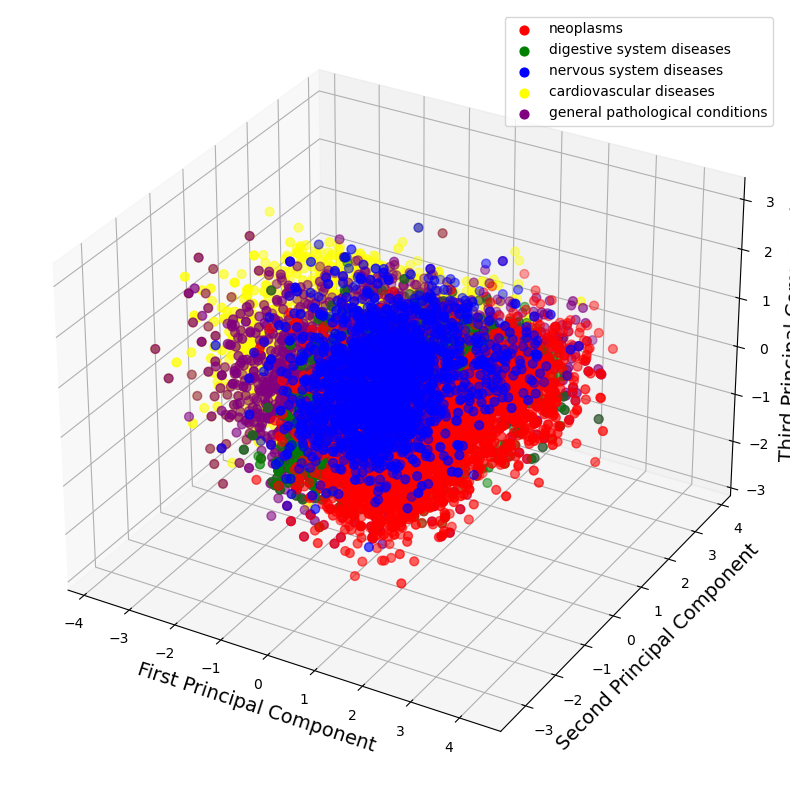

In [80]:
pca = PCA(n_components=3)
pca.fit(df_total) 
X_pca = pca.transform(df_total) 

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:"blue", 4:"yellow", 5:"purple"}
labl = {1:'neoplasms', 2:'digestive system diseases', 3:'nervous system diseases', 4:'cardiovascular diseases', 5:'general pathological conditions'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], label = labl[l], s=40)

ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

In [81]:
pca.explained_variance_

array([1.48857244, 1.33637828, 0.77510795])

In [82]:
pca.explained_variance_ratio_

array([0.19374951, 0.17394023, 0.10088645])

## KMeans

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score


NUM_CLUSTERS = 5
km = KMeans(n_clusters=NUM_CLUSTERS, n_init=100, random_state=42).fit(df_total)
y_clus= km.predict(df_total)

In [84]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

V measure: 0.09312561641495141
ARI: 0.06276860749235738
Sil.: 0.10953091971547728


## Agglomerative clustering

In [85]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

model.fit(df_total.to_numpy())
y_clus = model.labels_

In [86]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

V measure: 0.10381479600867437
ARI: 0.07443811850977318
Sil.: 0.06832244710488726


In [87]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='manhattan', linkage='average')

model.fit(df_total.to_numpy())
y_clus = model.labels_

In [88]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

V measure: 0.0038859444441486832
ARI: -0.00010832003926286997
Sil.: 0.10663728942725886


In [89]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='cosine', linkage='average')

model.fit(df_total.to_numpy())
y_clus = model.labels_

In [90]:
print(f'''V measure: {v_measure_score(y_clus, labels)}''')
print(f'''ARI: {adjusted_rand_score(y_clus,labels)}''')
print(f'''Sil.: {silhouette_score(df_total,y_clus)}''')

V measure: 0.10457268139962801
ARI: 0.0657315478713142
Sil.: 0.07338003574790862


## DBSCAN

In [91]:
from sklearn.cluster import DBSCAN

In [92]:
clustering = DBSCAN(eps=3, min_samples=50).fit(df_total)

In [93]:
np.unique(clustering.labels_)

array([0], dtype=int64)

# Topic modeling

In [94]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [95]:
df_total = pd.concat([df_train, df_test], ignore_index = True)

In [96]:
df_total

condition_label                                   medical_abstract  \
0                    5  tissue changes around loose prostheses canine ...   
1                    1  neuropeptide neuronspecific enolase levels ben...   
2                    2  sexually transmitted diseases colon rectum anu...   
3                    1  lipolytic factors associated murine human canc...   
4                    3  carotid restenosis predict increased risk late...   
...                ...                                                ...   
14433                4  management aortobronchial fistula graft replac...   
14434                5  tuberculous psoas muscle abscess following che...   
14435                4  clinical evaluation highfrequency ultrasonic m...   
14436                1  antitumor activity liposomeencapsulated doxoru...   
14437                4  unusual venous anomaly placenta authors presen...   

                                  medical_abstract_token  \
0      ['tissue', 'changes', 'around', 'loose', 'pros...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmitted', 'diseases', 'colon...   
3      ['lipolytic', 'factors', 'associated', 'murine...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
14433  ['management', 'aortobronchial', 'fistula', 'g...   
14434  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
14435  ['clinical', 'evaluation', 'highfrequency', 'u...   
14436  ['antitumor', 'activity', 'liposomeencapsulate...   
14437  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                    medical_abstract_pos  \
0      [('tissue', 'NOUN'), ('changes', 'NOUN'), ('ar...   
1      [('neuropeptide', 'ADV'), ('neuronspecific', '...   
2      [('sexually', 'ADV'), ('transmitted', 'VERB'),...   
3      [('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('...   
4      [('carotid', 'NOUN'), ('restenosis', 'NOUN'), ...   
...                                                  ...   
14433  [('management', 'NOUN'), ('aortobronchial', 'A...   
14434  [('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('...   
14435  [('clinical', 'ADJ'), ('evaluation', 'NOUN'), ...   
14436  [('antitumor', 'NOUN'), ('activity', 'NOUN'), ...   
14437  [('unusual', 'ADJ'), ('venous', 'ADJ'), ('anom...   

                            medical_abstract_lemma_token  \
0      ['tissue', 'change', 'around', 'loose', 'prost...   
1      ['neuropeptide', 'neuronspecific', 'enolase', ...   
2      ['sexually', 'transmit', 'disease', 'colon', '...   
3      ['lipolytic', 'factor', 'associate', 'murine',...   
4      ['carotid', 'restenosis', 'predict', 'increase...   
...                                                  ...   
14433  ['management', 'aortobronchial', 'fistula', 'g...   
14434  ['tuberculous', 'psoas', 'muscle', 'abscess', ...   
14435  ['clinical', 'evaluation', 'highfrequency', 'u...   
14436  ['antitumor', 'activity', 'liposomeencapsulate...   
14437  ['unusual', 'venous', 'anomaly', 'placenta', '...   

                                  medical_abstract_lemma  \
0      tissue change around loose prosthesis canine m...   
1      neuropeptide neuronspecific enolase level beni...   
2      sexually transmit disease colon rectum anus ch...   
3      lipolytic factor associate murine human cancer...   
4      carotid restenosis predict increase risk late ...   
...                                                  ...   
14433  management aortobronchial fistula graft replac...   
14434  tuberculous psoas muscle abscess follow chemop...   
14435  clinical evaluation highfrequency ultrasonic m...   
14436  antitumor activity liposomeencapsulated doxoru...   
14437  unusual venous anomaly placenta author present...   

                       medical_abstract_lemma_noFrequent  
0      tissue change around loose prosthesis canine m...  
1      neuropeptide neuronspecific enolase level beni...  
2      sexually trans

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Sample documents
documents = df_total["medical_abstract_lemma_noFrequent"]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the documents into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(documents)

# Number of topics
num_topics = 5

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)

# Function to display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

# Number of top words to display for each topic
num_top_words = 10

# Display the topics and their top words
print("Top words for each topic:")
display_topics(lda, vectorizer.get_feature_names_out(), num_top_words)

Top words for each topic:
Topic 1:
cancer, tumor, carcinoma, survival, child, month, breast, age, therapy, report

Topic 2:
artery, graft, angioplasty, aneurysm, bypass, fistula, aortic, coronary, vein, complication

Topic 3:
gene, human, virus, expression, leukemia, hepatitis, dna, antibody, protein, chromosome

Topic 4:
ventricular, coronary, valve, leave, cardiac, myocardial, artery, heart, atrial, pressure

Topic 5:
tumor, blood, may, clinical, level, therapy, acute, report, diagnosis, effect



In [116]:
# Get the topic distribution for each document
document_topics = lda.transform(tfidf_matrix)

# Display the assigned topics for each document
for i, doc_topics in enumerate(document_topics):
    print(f"Document {i + 1}:")
    for topic, prob in enumerate(doc_topics):
        print(f"Topic {topic}: Probability - {prob:.4f}")
    assigned_topic = doc_topics.argmax()
    print(f"Assigned Topic: {assigned_topic}\n")

Document 1:
Topic 0: Probability - 0.0255
Topic 1: Probability - 0.2056
Topic 2: Probability - 0.0255
Topic 3: Probability - 0.0256
Topic 4: Probability - 0.7178
Assigned Topic: 4

Document 2:
Topic 0: Probability - 0.0333
Topic 1: Probability - 0.0330
Topic 2: Probability - 0.0340
Topic 3: Probability - 0.0332
Topic 4: Probability - 0.8665
Assigned Topic: 4

Document 3:
Topic 0: Probability - 0.0231
Topic 1: Probability - 0.0258
Topic 2: Probability - 0.0231
Topic 3: Probability - 0.0229
Topic 4: Probability - 0.9051
Assigned Topic: 4

Document 4:
Topic 0: Probability - 0.0286
Topic 1: Probability - 0.0283
Topic 2: Probability - 0.5393
Topic 3: Probability - 0.0284
Topic 4: Probability - 0.3753
Assigned Topic: 2

Document 5:
Topic 0: Probability - 0.0279
Topic 1: Probability - 0.2639
Topic 2: Probability - 0.0272
Topic 3: Probability - 0.0278
Topic 4: Probability - 0.6533
Assigned Topic: 4

Document 6:
Topic 0: Probability - 0.7207
Topic 1: Probability - 0.0342
Topic 2: Probability - 

In [101]:
# Get the topic distribution for each document
document_topics = lda.transform(tfidf_matrix)
assigned_topics = []

# Display the assigned topics for each document
for i, doc_topics in enumerate(document_topics):
    assigned_topics.append(doc_topics.argmax())

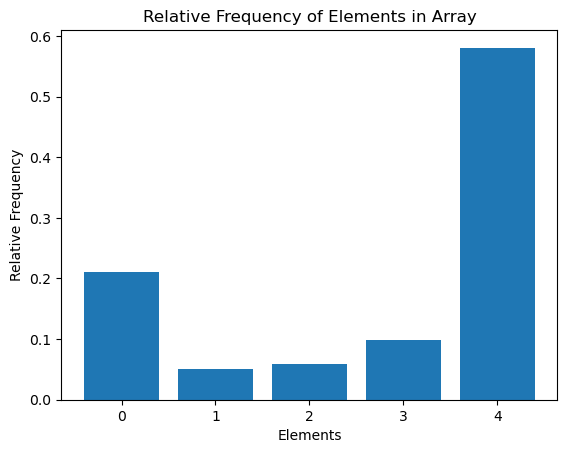

In [112]:
# Calculate the unique elements and their frequencies
unique_elements, element_counts = np.unique(assigned_topics, return_counts=True)

# Calculate relative frequencies
total_elements = len(assigned_topics)
relative_frequencies = element_counts / total_elements

# Create a bar chart of relative frequencies
plt.bar(unique_elements, relative_frequencies)

# Adding labels and title
plt.xlabel('Elements')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Elements in Array')

# Show the plot
plt.show()

In [110]:
pd.concat([df_test["condition_label"], df_train["condition_label"]]).value_counts()/(df_test.shape[0]+df_train.shape[0])*100

5    33.280233
1    21.907466
4    21.131736
3    13.332872
2    10.347694
Name: condition_label, dtype: float64

In [47]:
df_labels

condition_label                   condition_name
0                1                        neoplasms
1                2        digestive system diseases
2                3          nervous system diseases
3                4          cardiovascular diseases
4                5  general pathological conditions